In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('headbrain.csv')

In [3]:
dataset.shape

(237, 4)

In [4]:
dataset.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
X = dataset['Head Size(cm^3)'].values
y = dataset['Brain Weight(grams)'].values

In [9]:
mean_x = np.mean(X)
mean_y = np.mean(y)

In [10]:
numer = 0
denom = 0

for i in range(len(X)):
    numer += (mean_x - X[i]) * (mean_y - y[i])
    denom += (mean_x - X[i]) ** 2
    
slope = numer/denom
intercept = mean_y - slope * mean_x

In [11]:
print(slope, intercept)

0.26342933948939945 325.57342104944223


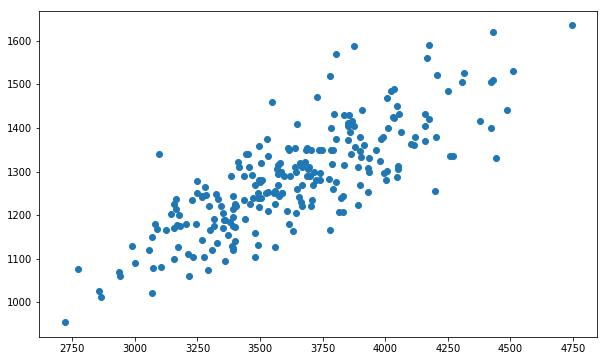

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)

In [14]:
predictions = []
for i in range(len(X)):
    pred = slope * X[i] + intercept
    predictions.append(pred)


In [16]:
for i in range(10):
    print("Actual : {}, Predicted : {}".format(y[i], predictions[i]))

Actual : 1530, Predicted : 1514.1666008256125
Actual : 1297, Predicted : 1310.2722920608173
Actual : 1335, Predicted : 1448.0458366137732
Actual : 1282, Predicted : 1320.546036300904
Actual : 1590, Predicted : 1425.9177720966638
Actual : 1300, Predicted : 1269.9676031189392
Actual : 1400, Predicted : 1322.6534710168191
Actual : 1255, Predicted : 1263.118440292215
Actual : 1355, Predicted : 1277.3436246246424
Actual : 1375, Predicted : 1374.549050896231


In [21]:
err = 0
n = len(y)
for i in range(n):
    err += (predictions[i] - y[i]) ** 2
mse = err/n
rmse = np.sqrt(mse)
print("Mean Squared Error",mse)
print("Root Mean Squared Error",rmse)

Mean Squared Error 5201.38402800233
Root Mean Squared Error 72.1206213783709


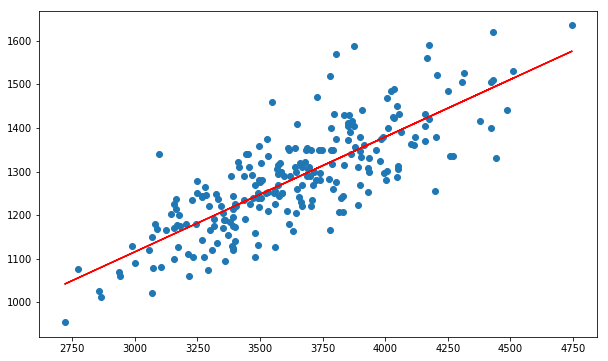

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,predictions,'red')